In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [5]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [7]:
df.head(15)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [10]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [20]:
df[['borough', 'year']]

,borough,year
0,Croydon,2016
1,Greenwich,2016
2,Bromley,2015
3,Redbridge,2016
4,Wandsworth,2008
...,...,...
13490599,Brent,2015
13490600,Hillingdon,2015
13490601,Sutton,2011
13490602,Croydon,2011


In [25]:
df.columns = list(map(str, df.columns))

In [26]:
years = list(map(str, range(2011, 2017)))
years

['2011', '2012', '2013', '2014', '2015', '2016']

In [27]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


In [31]:
condition = df['borough'] == 'Greenwich'
print (condition)

0           False
1            True
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: borough, Length: 13490604, dtype: bool


In [32]:
df[condition]

,lsoa_code,borough,major_category,minor_category,value,year,month
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
75,E01001600,Greenwich,Burglary,Burglary in Other Buildings,0,2016,11
100,E01001572,Greenwich,Drugs,Possession Of Drugs,0,2012,10
221,E01001634,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,0,2008,2
248,E01001635,Greenwich,Theft and Handling,Motor Vehicle Interference & Tampering,0,2009,2
...,...,...,...,...,...,...,...
13490518,E01001665,Greenwich,Drugs,Possession Of Drugs,0,2014,11
13490546,E01001632,Greenwich,Criminal Damage,Criminal Damage To Dwelling,0,2013,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [42]:
Casecrime = df[
    (df["year"]< 2017) &
    (df["year"] > 2011)
].groupby(["year"])["value"].sum()

<AxesSubplot:xlabel='year'>

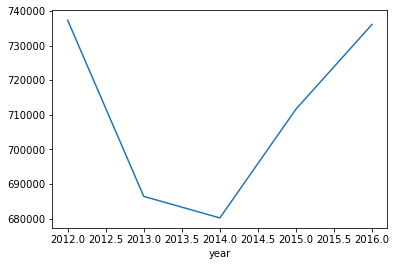

In [43]:
Casecrime.plot()

In [45]:
df.head(15)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [46]:
df["major_category"]

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: major_category, Length: 13490604, dtype: object

In [49]:
#criminal tertinggi pada tahun 2016
Casecrime = df[
    (df["year"] == 2016)
].groupby(["major_category"])["value"].sum()

In [50]:
Casecrime =  Casecrime.sort_values()

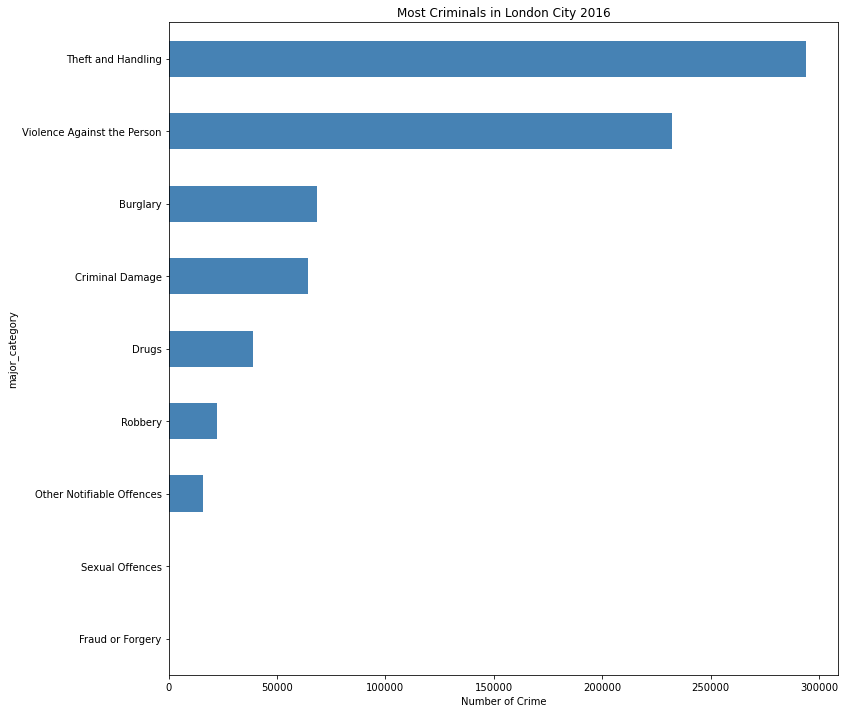

In [51]:
Casecrime.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Crime')
plt.title('Most Criminals in London City 2016')

plt.show()

In [55]:
Casecrime_major_category = df.groupby(df["major_category"], axis=0).sum()

In [56]:
Casecrime_major_category

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


In [58]:
Casecrime_major_category.drop(['year','month'],axis=1,inplace=True)

In [59]:
Casecrime_major_category

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


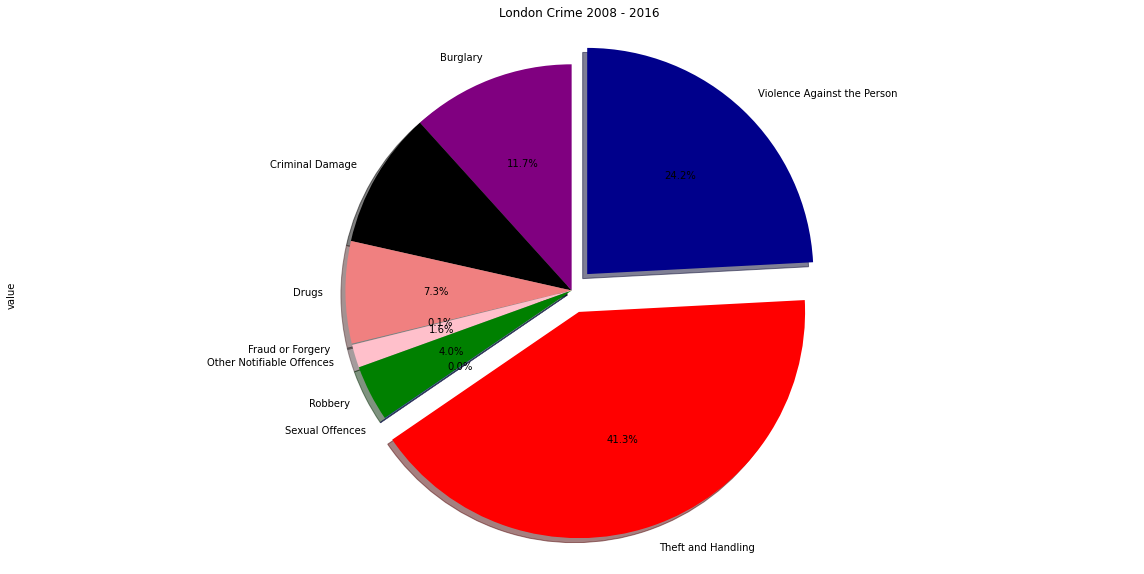

In [61]:
colors_list = ['purple', 'black', 'lightcoral', 'grey', 'pink', 'green', 'blue', 'red', 'darkblue']
explode_list = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1] 
Casecrime_major_category['value'].plot(kind='pie', figsize=(20, 10), autopct='%1.1f%%', startangle=90, shadow=True, colors=colors_list, explode=explode_list)

plt.title('London Crime 2008 - 2016')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()